<a href="https://colab.research.google.com/github/egagli/amath563/blob/main/labs/6/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import pyplot as plt

# Example: Sine Wave Reconstruction

In [2]:
# Model Definition
class SineRNN(nn.Module):
  def __init__(self, p = 0.5):
    super(SineRNN, self).__init__()
    self.rnn_layer = nn.RNN(input_size = 1, hidden_size = 128)
    self.out_layer = nn.Linear(in_features = 128, out_features = 1)
    self.p = p #Whether to use actual seq or output for next step
    
  def forward(self,seq, h = None):
        out = []
        X_in = torch.unsqueeze(seq[0],0)
        for X in seq:
            if np.random.rand()>self.p: #Use teacher forcing
                X_in = X.unsqueeze(dim = 0)
            tmp, h = self.rnn_layer(X_in, h)
            X_in = self.out_layer(tmp)
            out.append(X_in)
        return torch.stack(out).squeeze(1), h

In [3]:
seq = SineRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(seq.parameters(), lr=0.001)
max_iters = 10000
train_loss = []
for i in range(max_iters):
    data = np.sin(np.linspace(0,10,100)+2*np.pi*np.random.rand())
    xs = data[:-1]
    ys = data[1:]
    X = torch.Tensor(xs).view(-1,1,1)
    y = torch.Tensor(ys)
    if i%100==0:
        seq.p = min(seq.p+0.1,0.85)  # encourage training longer term predictions
    optimizer.zero_grad()
    rnn_out,_ = seq(X)
    loss = criterion(rnn_out[20:].view(-1),y[20:])
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    if i%500 == 0:
        print(f"i {i}, loss {loss.data:.4f}")

i 0, loss 0.4391
i 500, loss 0.3470
i 1000, loss 0.0894
i 1500, loss 0.1888
i 2000, loss 0.0104
i 2500, loss 0.0453
i 3000, loss 0.1691
i 3500, loss 0.0267
i 4000, loss 0.0567
i 4500, loss 0.0048
i 5000, loss 0.2345
i 5500, loss 0.0031
i 6000, loss 0.0181
i 6500, loss 0.0030
i 7000, loss 0.0233
i 7500, loss 0.0149
i 8000, loss 0.0030
i 8500, loss 0.0009
i 9000, loss 0.0042
i 9500, loss 0.0121


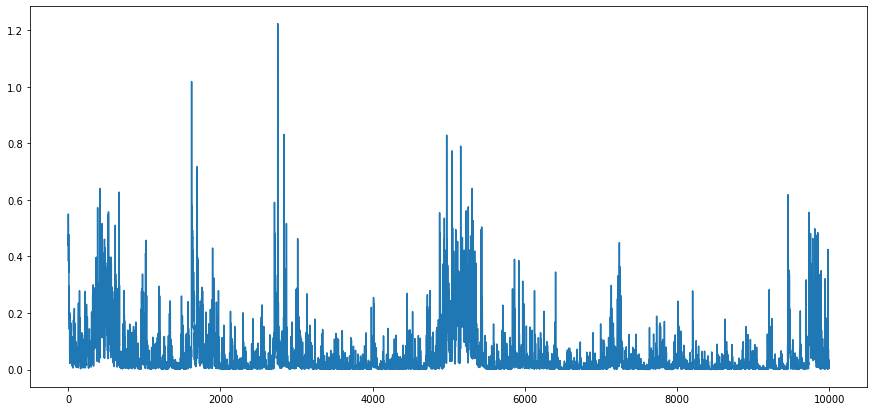

In [4]:
f,ax=plt.subplots(figsize=(15,7))
ax.plot(train_loss)

Validation Loss: 0.7406028509140015


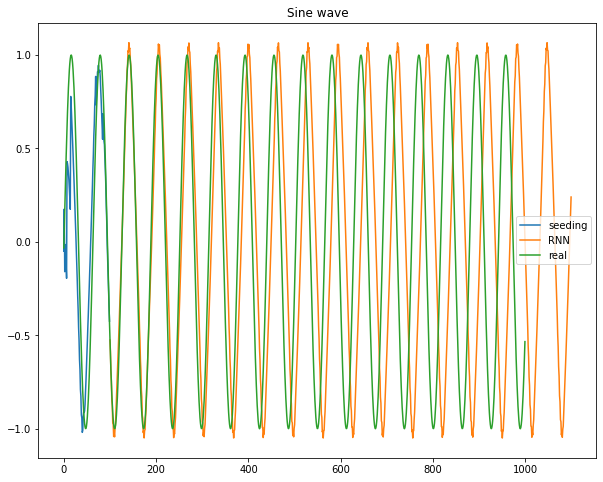

In [5]:
y = np.sin(np.linspace(0,100,1000)+2*np.pi*np.random.rand())
X = torch.Tensor(y)[:100].view(-1,1,1)
model_out,h = seq(X)
preds = []
pred = model_out[-1].view(1,1,1)
for i in range(1000):
    pred,h = seq(pred,h)
    preds.append(pred.data.numpy().ravel()[0])

plt.figure(figsize=[10,8])
xs = np.arange(model_out.size(0))
plt.plot(xs,model_out.data.numpy().ravel())
xs = np.arange(1000)+len(xs)
plt.plot(xs,preds)
plt.plot(y)
plt.legend(['seeding','RNN','real'])
plt.title('Sine wave')
val_loss = criterion(torch.Tensor(preds[:-100]), torch.Tensor(y[100:]))
print(f'Validation Loss: {val_loss}')

# Exercise: Cosine Generation

### Example generation of cosines with different amplitudes

Text(0.5, 1.0, 'Cosine: Random shifts and amplitudes')

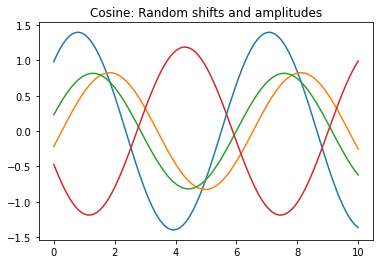

In [84]:
f = plt.figure()
for i in range(4):
  x = np.linspace(0,10,100)+2*np.pi*np.random.rand()
  amp = np.random.rand()+0.5
  y = amp*np.cos(x)
  plt.plot(np.linspace(0,10,100), y)
plt.title('Cosine: Random shifts and amplitudes')

In [85]:
# Model Definition
class CosineRNN(nn.Module):
  def __init__(self, p = 0.5):
    super(CosineRNN, self).__init__()
    self.rnn_layer = nn.RNN(input_size = 1, hidden_size = 128, nonlinearity='relu',dropout=0.5,num_layers=4)
    self.out_layer = nn.Linear(in_features = 128, out_features = 1)
    self.p = p #Whether to use actual seq or output for next step
    
  def forward(self,seq, h = None):
        out = []
        X_in = torch.unsqueeze(seq[0],0)
        for X in seq:
            if np.random.rand()>self.p: #Use teacher forcing
                X_in = X.unsqueeze(dim = 0)
            tmp, h = self.rnn_layer(X_in, h)
            X_in = self.out_layer(tmp)
            out.append(X_in)
        return torch.stack(out).squeeze(1), h

In [86]:
seq = CosineRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(seq.parameters(), lr=0.001)
max_iters = 10000
train_loss = []
for i in range(max_iters):
    amp = np.random.rand()+0.5
    shift = 2*np.pi*np.random.rand()
    data = amp*np.cos(np.linspace(0,10,100)+shift)
    xs = data[:-1]
    ys = data[1:]
    X = torch.Tensor(xs).view(-1,1,1)
    y = torch.Tensor(ys)
    if i%100==0:
        seq.p = min(seq.p+0.1,0.85)  # encourage training longer term predictions
    optimizer.zero_grad()
    rnn_out,_ = seq(X)
    loss = criterion(rnn_out[20:].view(-1),y[20:])
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    if i%500 == 0:
        print(f"i {i}, loss {loss.data:.4f}")

i 0, loss 0.3446
i 500, loss 0.3915
i 1000, loss 0.3239
i 1500, loss 0.4421
i 2000, loss 0.3066
i 2500, loss 0.5772
i 3000, loss 0.1183
i 3500, loss 0.0771
i 4000, loss 0.1754
i 4500, loss 0.0380
i 5000, loss 0.0255
i 5500, loss 0.0369
i 6000, loss 0.2982
i 6500, loss 0.1248
i 7000, loss 0.1288
i 7500, loss 0.0088
i 8000, loss 0.1529
i 8500, loss 0.0087
i 9000, loss 0.0209
i 9500, loss 0.1404


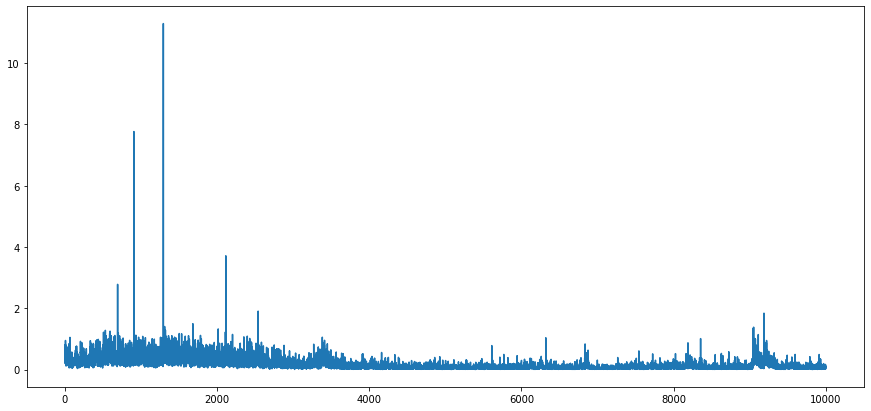

In [87]:
f,ax=plt.subplots(figsize=(15,7))
ax.plot(train_loss)

In [88]:
val_losses = []
amps = []
shifts = []

for i in range(1000):
  amp = np.random.rand()+0.5
  shift = 2*np.pi*np.random.rand()
  y = amp*np.cos(np.linspace(0,100,1000)+shift)
  X = torch.Tensor(y)[:100].view(-1,1,1) # take first 100
  model_out,h = seq(X)
  preds = []
  pred = model_out[-1].view(1,1,1)
  for ii in range(1000):
      pred,h = seq(pred,h)
      preds.append(pred.data.numpy().ravel()[0])

  val_loss = criterion(torch.Tensor(preds[:-100]), torch.Tensor(y[100:]))
  val_losses.append(val_loss)
  amps.append(amp)
  shifts.append(shift)

  if i%100==0:
    print(f'i = {i}')

i = 0
i = 100
i = 200
i = 300
i = 400
i = 500
i = 600
i = 700
i = 800
i = 900


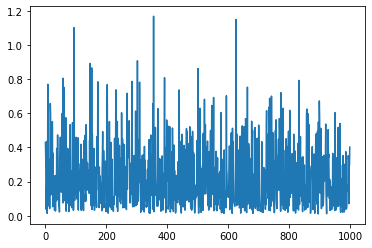

In [89]:
f,ax=plt.subplots()
ax.plot(val_losses)

In [96]:
best = np.argmin(np.abs(np.array(val_losses)))
worst = np.argmax(np.abs(np.array(val_losses)))

In [101]:
print(best,val_losses[best])

895 tensor(0.0103)


In [102]:
print(worst,val_losses[worst])

355 tensor(1.1687)


Text(0.5, 1.0, 'Cosine wave best prediction')

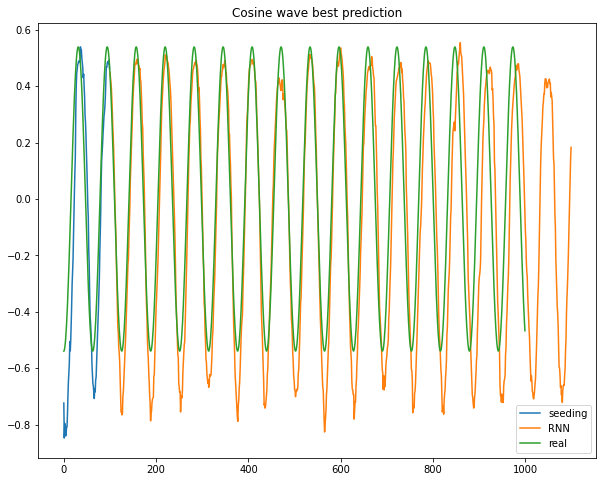

In [99]:
y = amps[best]*np.cos(np.linspace(0,100,1000)+shifts[best])
X = torch.Tensor(y)[:100].view(-1,1,1) # take first 100
model_out,h = seq(X)
preds = []
pred = model_out[-1].view(1,1,1)
for i in range(1000):
    pred,h = seq(pred,h)
    preds.append(pred.data.numpy().ravel()[0])

plt.figure(figsize=[10,8])
xs = np.arange(model_out.size(0))
plt.plot(xs,model_out.data.numpy().ravel())
xs = np.arange(1000)+len(xs)
plt.plot(xs,preds)
plt.plot(y)
plt.legend(['seeding','RNN','real'])
plt.title('Cosine wave best prediction')

Text(0.5, 1.0, 'Cosine wave worst prediction')

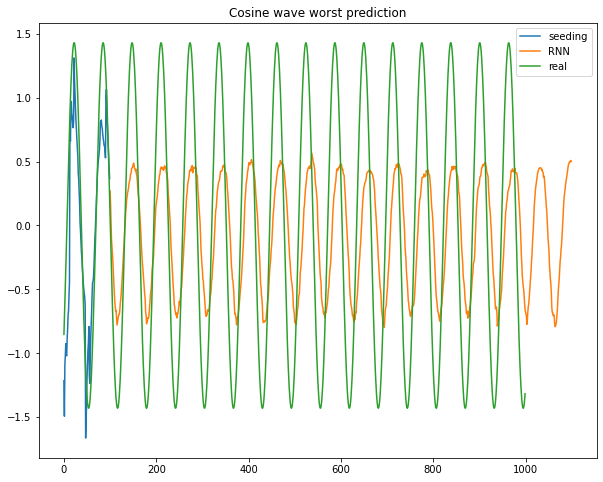

In [100]:
y = amps[worst]*np.cos(np.linspace(0,100,1000)+shifts[worst])
X = torch.Tensor(y)[:100].view(-1,1,1) # take first 100
model_out,h = seq(X)
preds = []
pred = model_out[-1].view(1,1,1)
for i in range(1000):
    pred,h = seq(pred,h)
    preds.append(pred.data.numpy().ravel()[0])

plt.figure(figsize=[10,8])
xs = np.arange(model_out.size(0))
plt.plot(xs,model_out.data.numpy().ravel())
xs = np.arange(1000)+len(xs)
plt.plot(xs,preds)
plt.plot(y)
plt.legend(['seeding','RNN','real'])
plt.title('Cosine wave worst prediction')

In [95]:
#Set Hyperaparameters

#Generate Train, Val data


#Generate Test data